# Covid 19 Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv("data/covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.shape

(306429, 8)

In [4]:
df.drop('SNo', inplace=True, axis=1)

In [5]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df['Country/Region'].value_counts()

Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: Country/Region, Length: 229, dtype: int64

In [7]:
df.isna().sum()

ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [10]:
df[df['Confirmed']<0]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
147524,11/02/2020,Unknown,Colombia,2021-04-02 15:13:53,-302844.0,0.0,0.0


In [11]:
df = df[~(df['Confirmed']<0)]

## Countries with maximun no of cases

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228328 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  228328 non-null  object 
 1   Province/State   228328 non-null  object 
 2   Country/Region   228328 non-null  object 
 3   Last Update      228328 non-null  object 
 4   Confirmed        228328 non-null  float64
 5   Deaths           228328 non-null  float64
 6   Recovered        228328 non-null  float64
dtypes: float64(3), object(4)
memory usage: 13.9+ MB


In [13]:
df['Confirmed'] = df['Confirmed'].astype('int32')
df['Country/Region'] = df['Country/Region'].astype("string")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228328 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  228328 non-null  object 
 1   Province/State   228328 non-null  object 
 2   Country/Region   228328 non-null  string 
 3   Last Update      228328 non-null  object 
 4   Confirmed        228328 non-null  int32  
 5   Deaths           228328 non-null  float64
 6   Recovered        228328 non-null  float64
dtypes: float64(2), int32(1), object(3), string(1)
memory usage: 13.1+ MB


In [15]:
most_cases = pd.DataFrame(df.groupby(['Country/Region']).sum()['Confirmed'])
most_cases.head()

,Confirmed
Country/Region,
Australia,9.447430e+06
Austria,2.000000e+00
Belgium,1.547341e+08
Brazil,2.649295e+09
Canada,1.934975e+08


In [16]:
most_cases.index

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
       'Colombia', 'Denmark', 'France', 'Germany', 'Hong Kong', 'India',
       'Iraq', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Macau',
       'Mainland China', 'Mexico', 'Netherlands', 'Others', 'Pakistan', 'Peru',
       'Russia', 'Spain', 'Sweden', 'Taiwan', 'UK', 'US', 'Ukraine'],
      dtype='object', name='Country/Region')

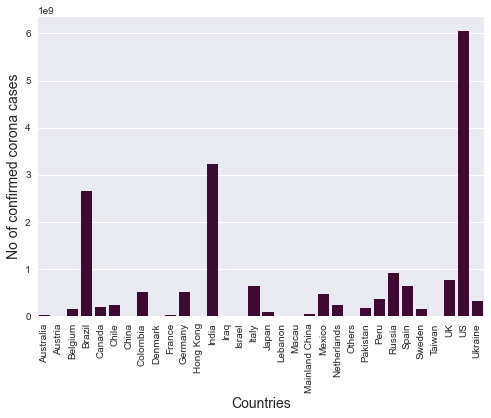

In [17]:
sns.barplot(x=most_cases.index, y=most_cases.Confirmed, data=pd.melt(most_cases), color = '#460237')
plt.xticks(rotation=90)
plt.xlabel("Countries",size=14)
plt.ylabel("No of confirmed corona cases", size=14)
sns.set(rc={'figure.figsize':(20,6)});

### Let's visualise deaths per country

In [18]:
death = pd.DataFrame(df.groupby(['Country/Region']).sum()['Deaths'])
death.head()

,Deaths
Country/Region,
Australia,268435.0
Austria,0.0
Belgium,4219275.0
Brazil,72339029.0
Canada,5692896.0


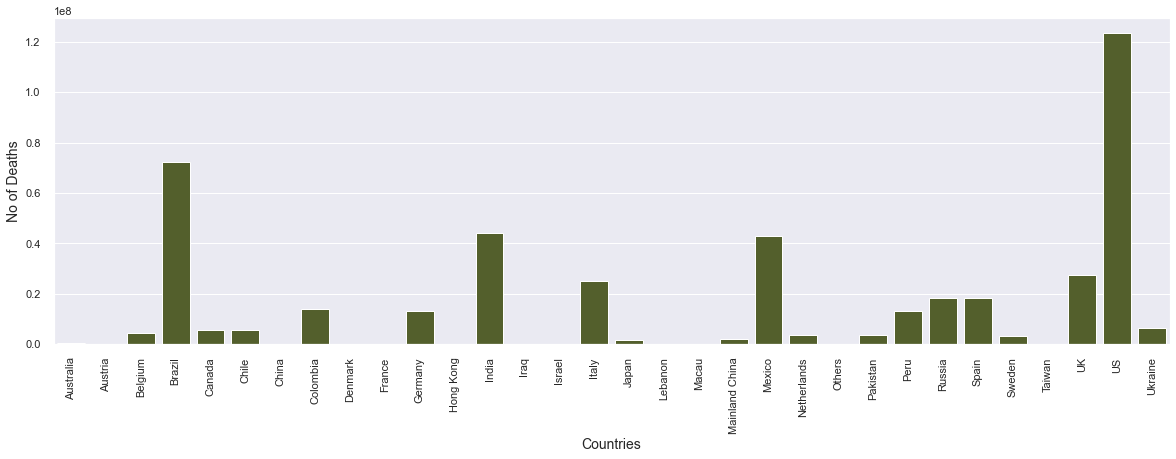

In [19]:
sns.barplot(x=death.index, y=death.Deaths, data=pd.melt(death), color = '#586723')
plt.xticks(rotation=90)
plt.xlabel("Countries",size=14)
plt.ylabel("No of Deaths", size=14)
sns.set(rc={'figure.figsize':(20,6)});

In [20]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [21]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0.0,0.0,1.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0.0,0.0,14.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0.0,0.0,6.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0.0,0.0,1.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0.0,0.0,0.0


### Lets visualize active cases per country

In [22]:
active = pd.DataFrame(df.groupby(['Country/Region']).sum()['Active'])
active.head()

,Active
Country/Region,
Australia,1959062.0
Austria,2.0
Belgium,150514800.0
Brazil,264963105.0
Canada,16227738.0


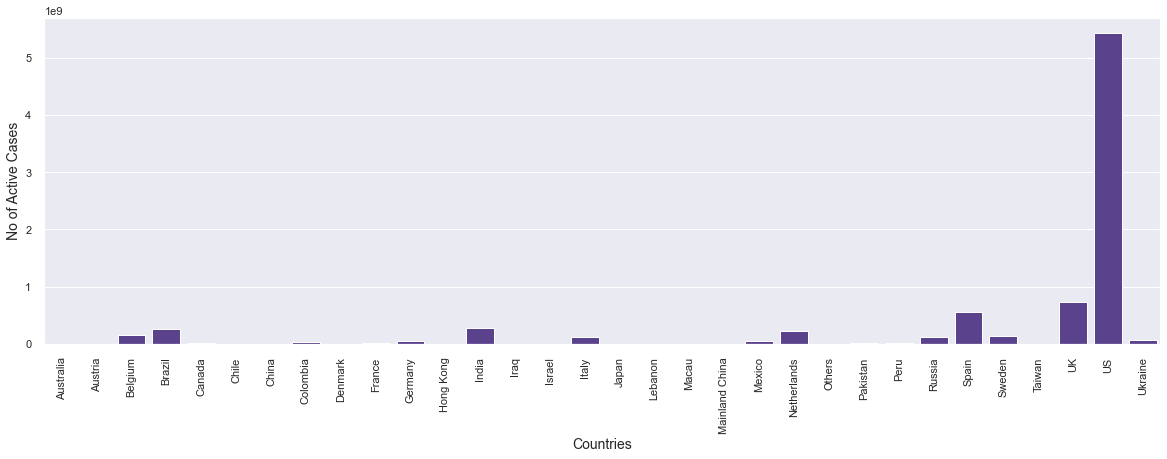

In [23]:
sns.barplot(x=active.index, y=active.Active, data=pd.melt(active), color = '#563798')
plt.xticks(rotation=90)
plt.xlabel("Countries",size=14)
plt.ylabel("No of Active Cases", size=14)
sns.set(rc={'figure.figsize':(20,6)});

##  Which province in the world has max number of cases?

In [24]:
province = pd.DataFrame(df.groupby(['Province/State','Country/Region']).sum()['Confirmed'])
province.reset_index(inplace=True)
province = province.sort_values(by='Confirmed',ascending=False).head(25)
province

,Province/State,Country/Region,Confirmed
90,California,US,696898013
373,Maharashtra,India,681186928
176,England,UK,666227518
643,Texas,US,552039886
583,Sao Paulo,Brazil,521308945
189,Florida,US,429469197
441,New York,US,380636880
307,Karnataka,India,282256260
266,Illinois,US,263055187
24,Andhra Pradesh,India,254740494


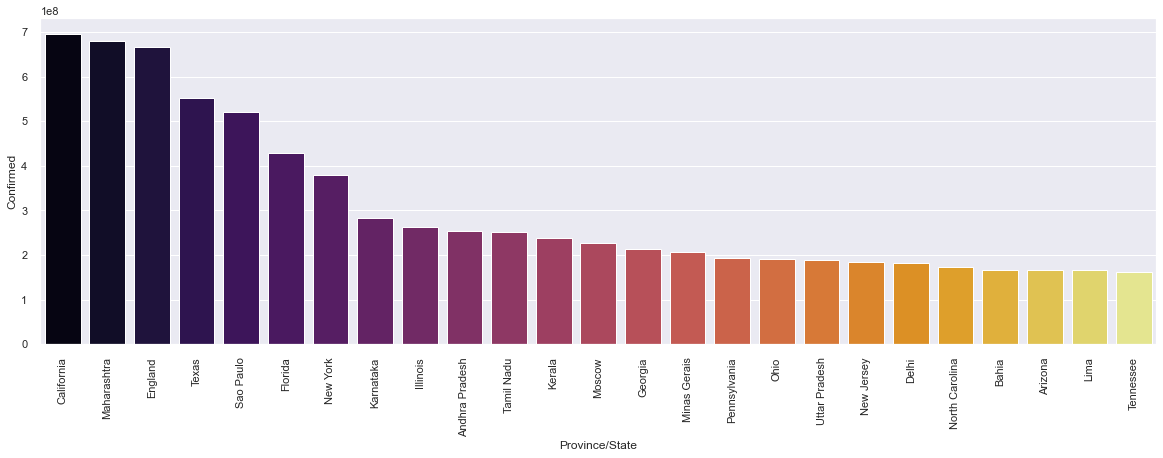

In [25]:
sns.barplot(x=province['Province/State'], y=province.Confirmed, data=pd.melt(province), palette='inferno')
plt.xticks(rotation=90)
sns.set_theme(style='ticks')
sns.set(rc={'figure.figsize':(20,6)});

## How many total deaths have been confirmed until now?

In [26]:
death = pd.DataFrame(df.groupby(['Country/Region','Province/State']).sum()['Deaths'])
death.reset_index(inplace=True)
death

,Country/Region,Province/State,Deaths
0,Australia,Australian Capital Territory,1257.0
1,Australia,Diamond Princess cruise ship,0.0
2,Australia,External territories,0.0
3,Australia,From Diamond Princess,0.0
4,Australia,Jervis Bay Territory,0.0
...,...,...,...
757,Ukraine,Vinnytsia Oblast,171216.0
758,Ukraine,Volyn Oblast,156312.0
759,Ukraine,Zakarpattia Oblast,230741.0
760,Ukraine,Zaporizhia Oblast,225346.0


In [27]:
# Total Death till now
df.Deaths.sum()

447832514.0

## Which country had the highest number of deaths?

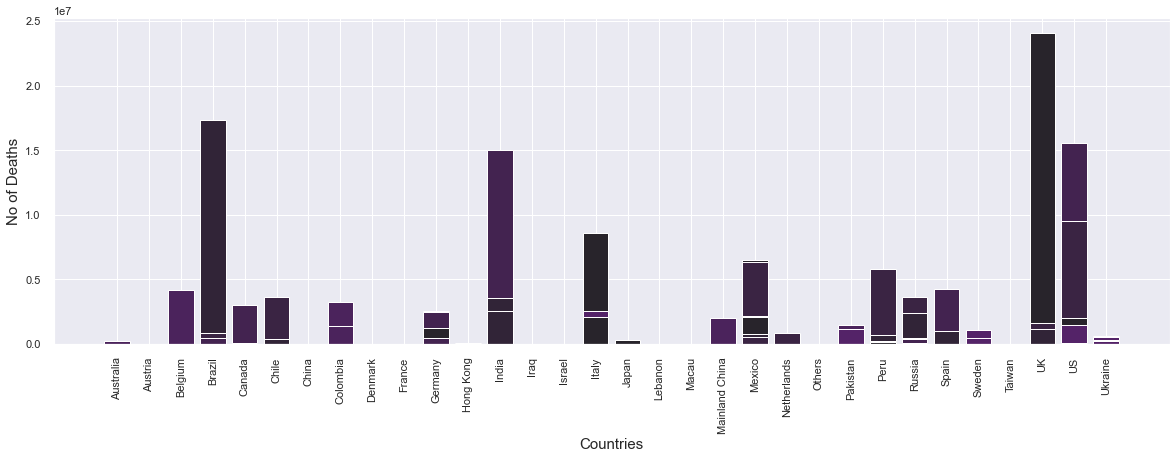

In [28]:
plt.bar(death['Country/Region'], death['Deaths'], width=0.8, color=sns.dark_palette('#542368'))
plt.xticks(rotation=90)
plt.xlabel("Countries",size=15)
plt.ylabel("No of Deaths",size=15);

## Let's check for correlation between no of confirmed cases and no of deaths

In [29]:
print(df.Confirmed.corr(df.Deaths))
mat = df[['Confirmed','Deaths','Recovered']].corr()
mat

0.8811066022501512


,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.881107,0.498840
Deaths,0.881107,1.000000,0.421546
Recovered,0.498840,0.421546,1.000000


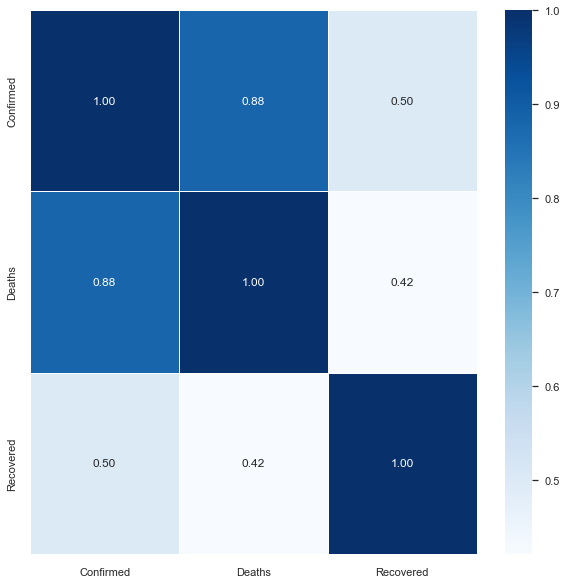

In [30]:
plt.subplots(figsize=(10,10))
sns.heatmap(mat,annot=True,fmt='.2f',cmap='Blues', linecolor='white',linewidth=1);

## Which Country had the best recovery rate?


In [31]:
df['Confirmed'] = df['Confirmed'].astype('int64')
df['Recovered'] = df['Recovered'].astype('int64')

In [32]:
rec = pd.DataFrame(df[['Recovered','Confirmed']].value_counts(normalize=True)*100)
rec.reset_index(inplace=True)
rec.rename(columns = {0:'Recovery Rate'}, inplace=True)
rec

,Recovered,Confirmed,Recovery Rate
0,0,0,1.296381
1,13,13,0.356943
2,0,1,0.302635
3,1,1,0.284240
4,18,18,0.231684
...,...,...,...
172495,1445,3909,0.000438
172496,1445,6256,0.000438
172497,1446,1558,0.000438
172498,1446,1807,0.000438


In [33]:
rec['Country/Region'] = df['Country/Region'].copy()
rec

,Recovered,Confirmed,Recovery Rate,Country/Region
0,0,0,1.296381,Mainland China
1,13,13,0.356943,Mainland China
2,0,1,0.302635,Mainland China
3,1,1,0.284240,Mainland China
4,18,18,0.231684,Mainland China
...,...,...,...,...
172495,1445,3909,0.000438,Canada
172496,1445,6256,0.000438,Germany
172497,1446,1558,0.000438,UK
172498,1446,1807,0.000438,Brazil


In [34]:
rec = rec.groupby('Country/Region').sum()
rec.reset_index(inplace=True)
rec[['Recovered','Confirmed']].value_counts(normalize=True)*100
rec

,Country/Region,Recovered,Confirmed,Recovery Rate
0,Australia,104171347,215617200,1.666900
1,Austria,0,1481,0.002190
2,Belgium,348801,1254764,0.124820
3,Brazil,331066466,623268392,2.372902
4,Canada,206835038,395385717,2.410129
5,Chile,213683030,368442745,1.487772
6,China,62431,706597,0.219859
7,Colombia,404442974,734791472,2.830139
8,Denmark,25596693,50782778,0.285992
9,France,137333909,252637867,1.346309


In [35]:
rec['Country/Region'] = rec['Country/Region'].astype('str')

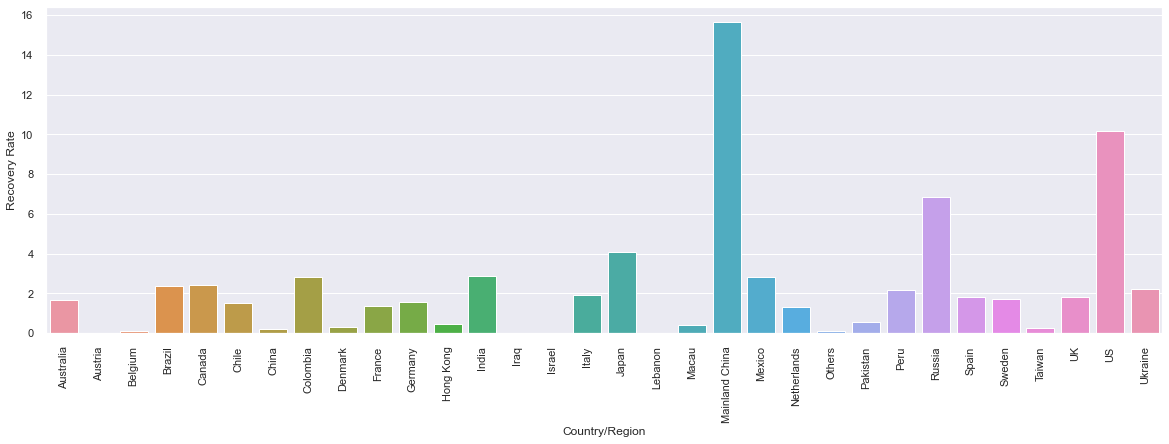

In [36]:
sns.barplot(x=rec['Country/Region'], y=rec['Recovery Rate'],data=rec)
plt.xticks(rotation=90);

# Let's start and do some EDA on INDIA 

In [37]:
df1 = df[df['Country/Region']=='India']

In [38]:
df1.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
39260,06/10/2020,Andaman and Nicobar Islands,India,2021-04-02 15:13:53,33,0.0,33,0.0
39261,06/10/2020,Andhra Pradesh,India,2021-04-02 15:13:53,5070,77.0,2802,2191.0
39277,06/10/2020,Arunachal Pradesh,India,2021-04-02 15:13:53,57,0.0,1,56.0
39278,06/10/2020,Assam,India,2021-04-02 15:13:53,2937,4.0,1085,1848.0
39300,06/10/2020,Bihar,India,2021-04-02 15:13:53,5459,32.0,2864,2563.0


In [39]:
df_copy = df1.copy()

In [40]:
to_drop = ['ObservationDate','Country/Region', 'Last Update']
df1.drop(to_drop, inplace=True,axis=1)

In [41]:
df1.head()

,Province/State,Confirmed,Deaths,Recovered,Active
39260,Andaman and Nicobar Islands,33,0.0,33,0.0
39261,Andhra Pradesh,5070,77.0,2802,2191.0
39277,Arunachal Pradesh,57,0.0,1,56.0
39278,Assam,2937,4.0,1085,1848.0
39300,Bihar,5459,32.0,2864,2563.0


In [42]:
confirmed = df1.groupby(['Province/State']).sum()['Confirmed']
deaths = df1.groupby(['Province/State']).sum()['Deaths']
recovered = df1.groupby(['Province/State']).sum()['Recovered']
active = df1.groupby(['Province/State']).sum()['Active']

In [43]:
type(active)

pandas.core.series.Series

In [44]:
df1 = pd.DataFrame({'State':confirmed.index,'Confirmed':confirmed.values,'Deaths':deaths.values,'Recovered':recovered.values,'Active':active.values})

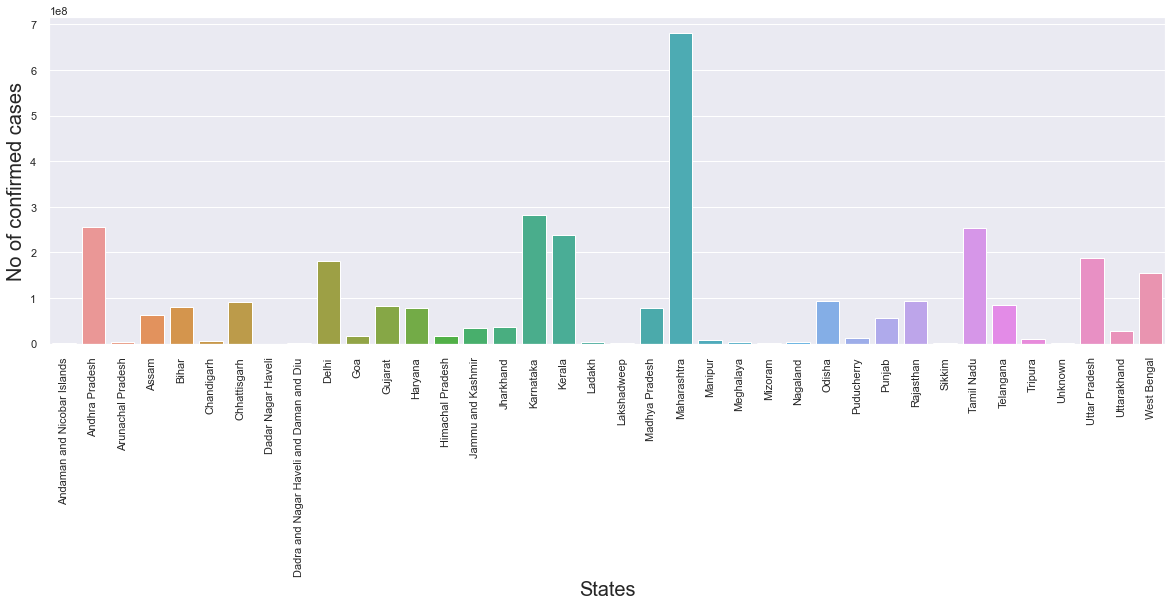

In [46]:
sns.barplot(x=df1.State,y=df1.Confirmed)
plt.xticks(rotation=90)
plt.xlabel("States", size=20)
plt.ylabel("No of confirmed cases",size=20);

In [47]:
df_copy.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
39260,06/10/2020,Andaman and Nicobar Islands,India,2021-04-02 15:13:53,33,0.0,33,0.0
39261,06/10/2020,Andhra Pradesh,India,2021-04-02 15:13:53,5070,77.0,2802,2191.0
39277,06/10/2020,Arunachal Pradesh,India,2021-04-02 15:13:53,57,0.0,1,56.0
39278,06/10/2020,Assam,India,2021-04-02 15:13:53,2937,4.0,1085,1848.0
39300,06/10/2020,Bihar,India,2021-04-02 15:13:53,5459,32.0,2864,2563.0


In [48]:
obv_date = df_copy['ObservationDate']
delhi = df_copy[df_copy['Province/State']=='Delhi']['Confirmed']

In [49]:
start = obv_date.iloc[0]
end = obv_date.iloc[-1]

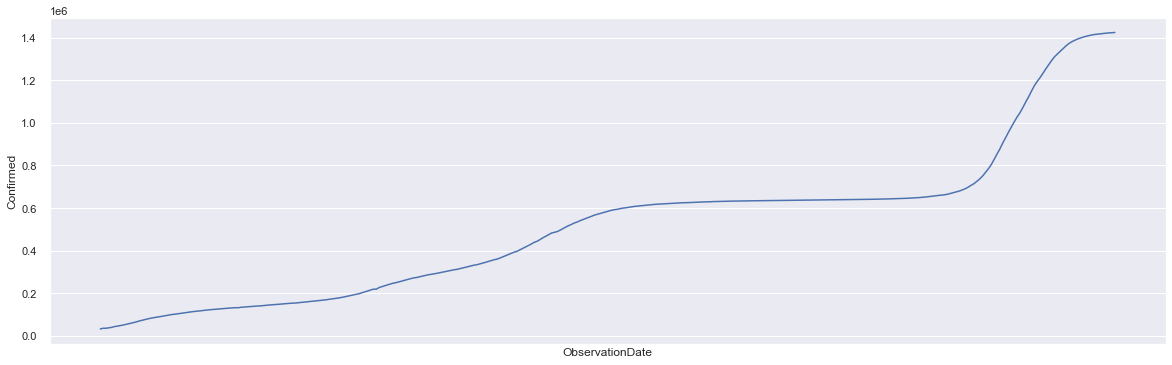

In [50]:
sns.lineplot(x=obv_date,y=delhi)
plt.xticks([]);

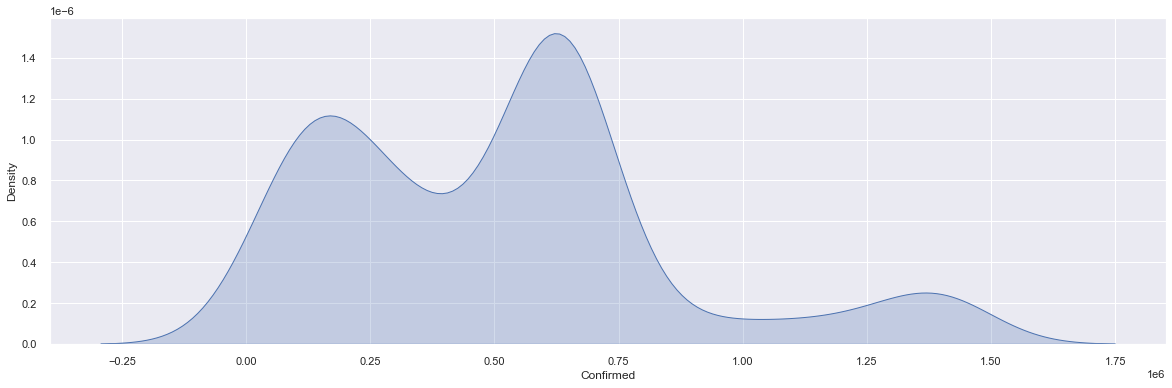

In [51]:
sns.kdeplot(delhi,shade=True);

In [52]:
df1.head()

,State,Confirmed,Deaths,Recovered,Active
0,Andaman and Nicobar Islands,1395784,17867.0,1319037,58880.0
1,Andhra Pradesh,254740494,2013926.0,237562013,15164555.0
2,Arunachal Pradesh,4363201,13602.0,4037123,312476.0
3,Assam,62475956,304170.0,57704484,4467302.0
4,Bihar,80951413,454187.0,74751758,5745468.0


In [53]:
df1.describe()

,Confirmed,Deaths,Recovered,Active
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01
mean,8.476553e+07,1.164632e+06,7.626995e+07,7.330949e+06
std,1.292883e+08,2.524507e+06,1.147746e+08,1.254016e+07
min,2.200000e+01,0.000000e+00,0.000000e+00,2.000000e+01
25%,3.750228e+06,3.270500e+04,3.374646e+06,3.238838e+05
50%,3.600901e+07,4.150830e+05,3.230335e+07,3.387466e+06
75%,9.227322e+07,1.086026e+06,8.151576e+07,8.275057e+06
max,6.811869e+08,1.498093e+07,5.974808e+08,6.872519e+07


In [54]:
df1['Deaths'].max()

14980930.0

Text(0.5, 0, 'States')

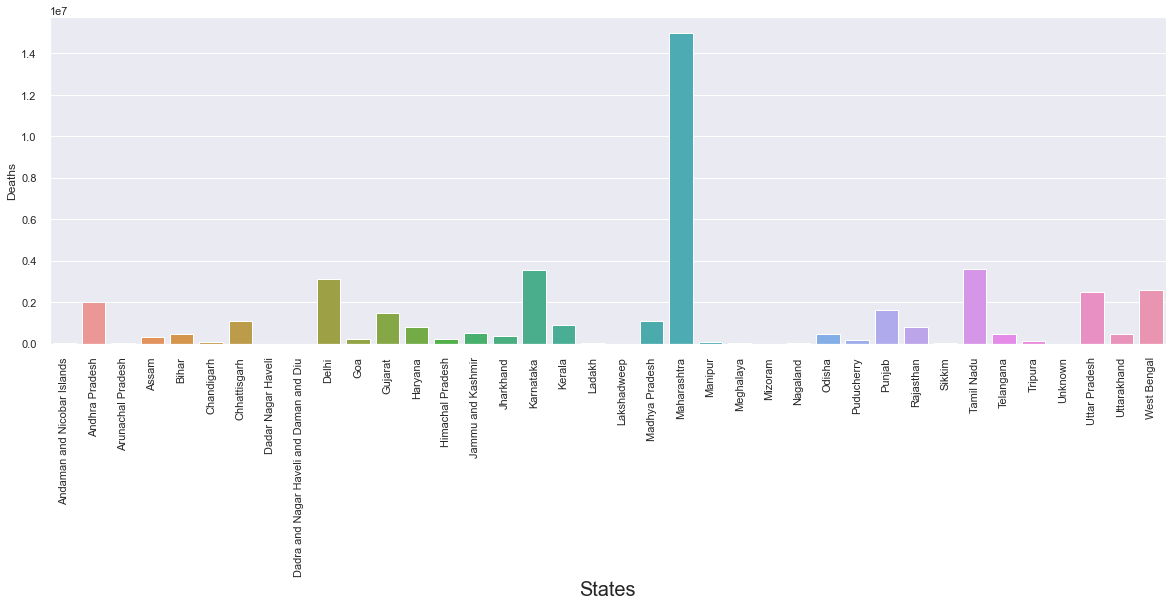

In [55]:
sns.barplot(x='State',y='Deaths',data=df1);
plt.xticks(rotation=90)
plt.xlabel("States", size=20)

In [64]:
confirmed = pd.DataFrame(df1.groupby(['State']).sum()['Confirmed'])
confirmed.reset_index(inplace=True)
confirmed = confirmed.sort_values(by='Confirmed',ascending=False).head(10)

deaths = pd.DataFrame(df1.groupby(['State']).sum()['Deaths'])
deaths.reset_index(inplace=True)
deaths = deaths.sort_values(by='Deaths',ascending=False).head(10)

recovered = pd.DataFrame(df1.groupby(['State']).sum()['Recovered'])
recovered.reset_index(inplace=True)
recovered = recovered.sort_values(by='Recovered',ascending=False).head(10)

active = pd.DataFrame(df1.groupby(['State']).sum()['Active'])
active.reset_index(inplace=True)
active = active.sort_values(by='Active',ascending=False).head(10)

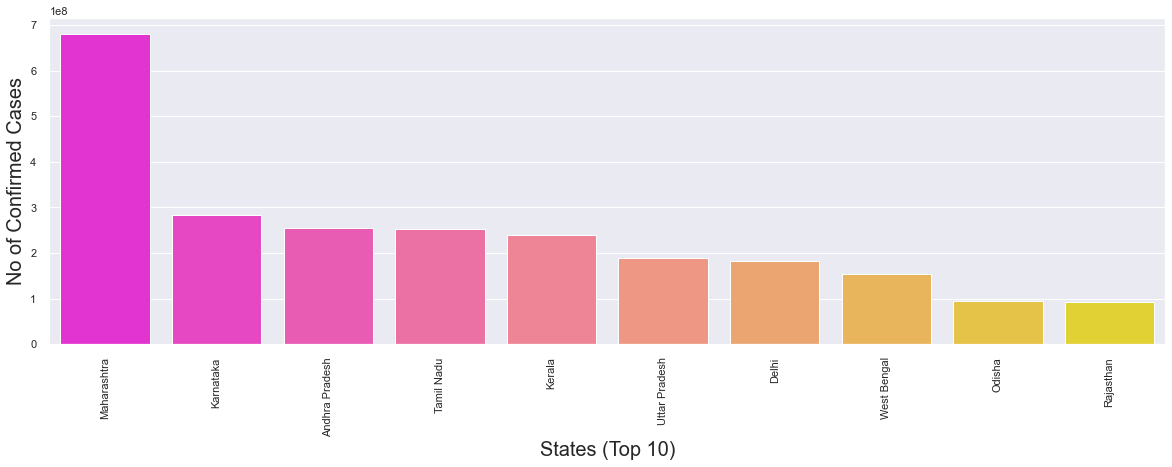

In [80]:
sns.barplot(x='State', y='Confirmed', data=confirmed, palette='spring')
plt.xticks(rotation=90)
sns.set_theme(style='ticks')
plt.xlabel("States (Top 10)",size=20)
plt.ylabel("No of Confirmed Cases",size=20)
sns.set(rc={'figure.figsize':(20,6)});

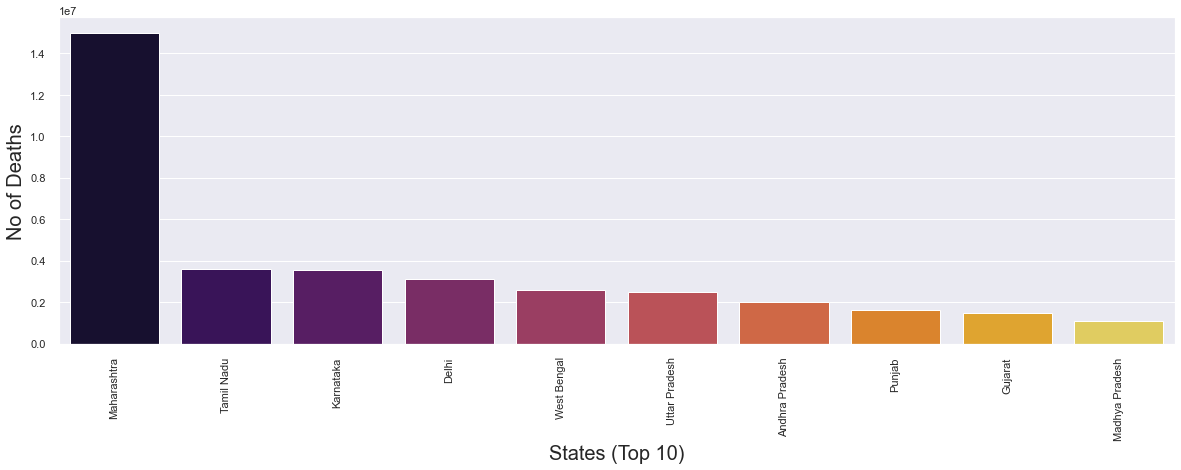

In [81]:
sns.barplot(x='State', y='Deaths', data=deaths, palette='inferno')
plt.xticks(rotation=90)
sns.set_theme(style='ticks')
plt.xlabel("States (Top 10)",size=20)
plt.ylabel("No of Deaths",size=20)
sns.set(rc={'figure.figsize':(20,6)});

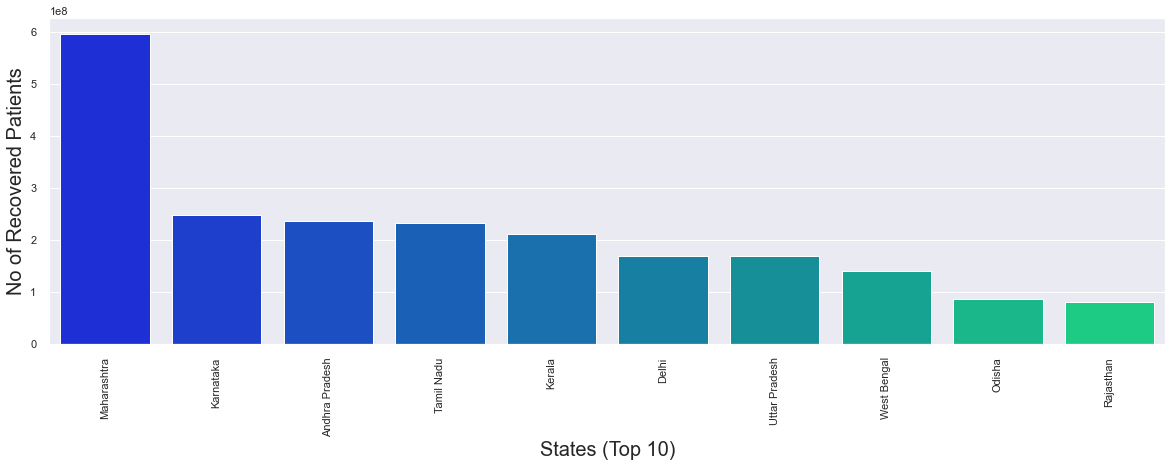

In [82]:
sns.barplot(x='State', y='Recovered', data=recovered, palette='winter')
plt.xticks(rotation=90)
sns.set_theme(style='ticks')
plt.xlabel("States (Top 10)",size=20)
plt.ylabel("No of Recovered Patients",size=20)
sns.set(rc={'figure.figsize':(20,6)});

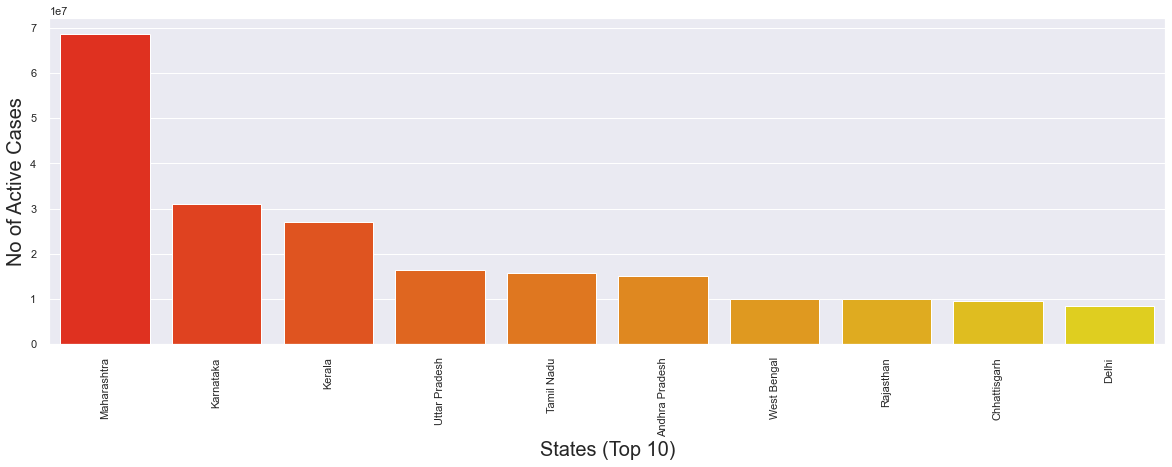

In [83]:
sns.barplot(x='State', y='Active', data=active, palette='autumn')
plt.xticks(rotation=90)
sns.set_theme(style='ticks')
plt.xlabel("States (Top 10)",size=20)
plt.ylabel("No of Active Cases",size=20)
sns.set(rc={'figure.figsize':(20,6)});